# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [45]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


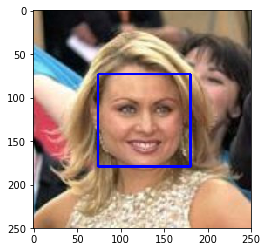

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[100])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
per_h = 0
per_d = 0
for himg, dogimg in zip(human_files_short, dog_files_short):
    if face_detector(himg):
        per_h +=1 
        # we got 100 images in the lists so we can 
        # just add em up to get the percentage, no need to normalize
    if face_detector(dogimg):
        per_d +=1
print("Percent of human faces detected: {}\n".format(per_h), 
      "Percent of \"dog faces\" (false positives) detected: {}".format(per_d))
"""
results:
Percent of human faces detected: 98
 Percent of "dog faces" (false positives) detected: 17
"""

Percent of human faces detected: 98
 Percent of "dog faces" (false positives) detected: 17


'\nresults:\nPercent of human faces detected: 98\n Percent of "dog faces" (false positives) detected: 17\n'

We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [4]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

###################
# we didn't pursue that further....
##################


# necessary imports
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
from torchvision import transforms
from PIL import Image

torch.Size([3, 250, 250])


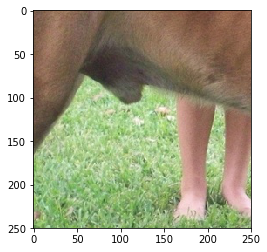

In [6]:
# some testing
for image in np.array([dog_files[0]], dtype='<U106'):
    img = Image.open((image))
    trans = transforms.ToPILImage()
    trans1 = transforms.ToTensor()
    #transc = transforms.CenterCrop(250)
    transc = transforms.RandomCrop(250)
    #plt.imshow(trans(trans1(img)))
    # apply the 3 transforms to image
    # first randomcrop, then to tensor, then to PIL
    plt.imshow(trans(trans1(transc((img)))))
    # 3 channels, 250x250 size
    print(trans1(transc(img)).shape)

In [7]:
for i in range(0,8000,600):
    img = cv2.imread(dog_files[i]) 
    # our dog files seem to be "out of whack" concerning the shape
    # human faces are 250 x 250 pixels
    # need to crop the dog "faces" to 250 as well 
    print(torch.tensor(img).shape)

torch.Size([648, 800, 3])
torch.Size([216, 288, 3])
torch.Size([424, 283, 3])
torch.Size([768, 1024, 3])
torch.Size([498, 328, 3])
torch.Size([427, 640, 3])
torch.Size([428, 640, 3])
torch.Size([375, 500, 3])
torch.Size([375, 500, 3])
torch.Size([960, 1280, 3])
torch.Size([480, 640, 3])
torch.Size([317, 422, 3])
torch.Size([394, 640, 3])
torch.Size([320, 480, 3])


In [8]:
# create our network structure - we just need to detect human faces,
# not differentiate between human faces
# googling a little...: https://hackernoon.com/binary-face-classifier-using-pytorch-2d835ccb7816

#adding "random noise" to images for training different angles etc.

transform_train = transforms.Compose([
                                transforms.RandomResizedCrop(250),                            
                                transforms.RandomHorizontalFlip(),
                                transforms.RandomRotation(20),
                                transforms.ToTensor(),
                                transforms.Normalize(
                                    [0.5, 0.5, 0.5],
                                    [0.5, 0.5, 0.5]
                                )
    
])

# no need to rotate etc. here
transform_test = transforms.Compose([
                                # need to crop to 250 here as well
                                transforms.CenterCrop(250),
                                transforms.ToTensor(),
                                transforms.Normalize(
                                    [0.5, 0.5, 0.5],
                                    [0.5, 0.5, 0.5]
                                )
    
])


In [9]:
# for our purposes, combine train data and labels, then split into train and validation
labels_h = np.ones(len(human_files)) # ones for humans - faces present
labels_d = np.zeros(len(dog_files)) # zeros for dogs - no faces


torch.Size([3, 250, 250])


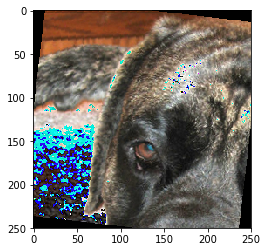

In [10]:
for image in np.array([dog_files[10]], dtype='<U106'):
    img = Image.open((image))
    trans = transform_train
    plt.imshow(transforms.ToPILImage()(trans(img)))
    print(trans(img).shape)

In [5]:
from torch.utils.data import Dataset, DataLoader
from torch.utils.data.sampler import SubsetRandomSampler

In [6]:
class FaceRecDataset(Dataset):
    """Face Landmarks dataset."""

    def __init__(self, #csv_file,
                 root_dir2,
                 root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directories with all the images.
            root_dir2 (string): Directories with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        
        human_files = np.array(glob(root_dir)) 
        dog_files = np.array(glob(root_dir2)) 
        labels_h = np.ones(len(human_files))
        labels_d = np.zeros(len(dog_files))
        
        self.data = np.concatenate((human_files,dog_files))
        self.labels = np.concatenate((labels_h, labels_d))
        self.transform = transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        # get image with PIL
        img_name = self.data[idx] #Image.fromarray
        image = Image.open(img_name)
        
        #image = Image.fromarray(np.array(img_name))
        #landmarks = self.landmarks_frame.iloc[idx, 1:].as_matrix()
        #landmarks = landmarks.astype('float').reshape(-1, 2)
        
        label = self.labels[idx]
        
        if self.transform:
            image = self.transform(image)
            #label = torch.tensor(np.array(label))
        
        return image, label

In [9]:
dataset = FaceRecDataset(root_dir2 = "/data/dog_images/*/*/*", root_dir="/data/lfw/*/*" , 
                         transform=transform_train)

loader = DataLoader(dataset,
                    batch_size=20,
                    shuffle=True,
                    num_workers=1)

testing = 0
for batch_idx, (data, target) in enumerate(loader):
    print('Batch idx: {}\n shape of input data: {}\n target: {}'.format(
        batch_idx, data.shape, target))
    testing +=1
    if testing == 2:
        break

Batch idx: 0
 shape of input data: torch.Size([20, 3, 250, 250])
 target: tensor([ 1.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,
         0.,  1.,  0.,  1.,  1.,  1.,  0.,  1.], dtype=torch.float64)
Batch idx: 1
 shape of input data: torch.Size([20, 3, 250, 250])
 target: tensor([ 1.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,  0.,  1.,
         0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.], dtype=torch.float64)


In [10]:
# split dataset into train, test and valid 

test_size = 0.1
valid_size = 0.2
batch_size = 20

# for test split
num_data = len(dataset)
indices_data = list(range(num_data))
np.random.shuffle(indices_data)
split_tt = int(np.floor(test_size * num_data))
train_idx, test_idx = indices_data[split_tt:], indices_data[:split_tt]

# for train / valid split
num_train = len(train_idx)
indices_train = list(range(num_train))
np.random.shuffle(indices_train)
split_tv = int(np.floor(valid_size * num_train))
train_idx, valid_idx = indices_train[split_tv:], indices_train[:split_tv]

# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)
valid_sampler = SubsetRandomSampler(valid_idx)
#Loaders contains the data in tuple format 

# (Image in form of tensor, label)
train_loader = DataLoader(dataset, batch_size=batch_size, sampler=train_sampler, num_workers=1)
valid_loader = DataLoader(dataset, batch_size=batch_size, sampler=valid_sampler, num_workers=1)
test_loader = DataLoader(dataset, batch_size=batch_size, sampler=test_sampler, num_workers=1)
# variable representing classes of the images
classes = [0,1]

In [ ]:
## if we have time we can tinker with this in the future

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [11]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()
    print("moved model to cuda")

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:04<00:00, 117693516.94it/s]


In [47]:
# add agnostic code for cuda:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cpu


In [17]:
# VGG16.to(device)

In [18]:
# what are the vgg16 layers?
print(VGG16)
# ok so VGG16 does not have softmax applied
# we need to do that to get the index of the predicted class
# for simplicity we can just call argmax on it since we don't need the 
# probabilities

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [13]:
from PIL import Image
import torchvision.transforms as transforms

# we normalize here
# use images of 224x224 size

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
    transform = transforms.Compose([transforms.CenterCrop(224),
                                    transforms.ToTensor(),
                                    normalize       
                                    ])
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    # preprocess the image first and convert to actual image
    image = Image.open(img_path)
    # apply transforms
    image = transform(image)
    # need to add "batch dimension" for the model to accept our input
    image.unsqueeze_(0)
    # use cuda?
    image = image.to(device)
    if use_cuda:
        VGG16.cuda() 
    # get prediction (will we get an index for that?)
    VGG16.eval()
    with torch.no_grad():
        prediction = VGG16(image)
    # prediction needs to be run through
    values, indices = prediction.max(1) # get the max along the dim=1
    if use_cuda:
        return indices.cpu().numpy()[0] # return the index as an integer
    else:
        return indices.numpy()[0] # return the index as an integer

In [13]:
print(dog_files[18])

/data/dog_images/train/103.Mastiff/Mastiff_06820.jpg


In [14]:
VGG16_predict(dog_files[22])

243

In [15]:
VGG16_predict(human_files[22])

441

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [14]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
    transform = transforms.Compose([transforms.CenterCrop(224),
                                    transforms.ToTensor(),
                                    normalize       
                                    ])
    # mostly copied from above...
    # preprocess the image first and convert to actual image
    image = Image.open(img_path)
    # apply transforms
    image = transform(image)
    # need to add "batch dimension" for the model to accept our input
    image.unsqueeze_(0)
    # get prediction (will we get an index for that?)
    VGG16.eval()
    with torch.no_grad():
        prediction = VGG16(image)
    # prediction needs to be run through
    values, indices = prediction.max(1) # get the max along the dim=1
    dog_index = indices.numpy()[0]  # get index as an integer
    if dog_index <= 268 and dog_index >= 151: # needs to be between 151 and 268 inclusive
        return True
    else:
        return False

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 


In [24]:
### TODO: Test the performance of the function
### on the images in human_files_short and dog_files_short.
p_dog = 0
p_hum = 0
for hfile, dfile in zip(human_files_short, dog_files_short):
    if dog_detector(hfile):
        p_hum+=1
    if dog_detector(dfile):
        p_dog+=1
print("humans detected as dogs: {}%\n".format(p_hum),
     "dogs detected as dogs: {}%".format(p_dog))

humans detected as dogs: 1%
 dogs detected as dogs: 91%


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [25]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [15]:
import os
from torchvision import datasets

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

# largely copy our tests from the first optional exercise which we don't continue to pursue at this moment

In [18]:
dog_images_train_testing = np.array(glob("/data/dog_images/train/*/*")) 

In [19]:
dog_images_train_testing[2300:2320]
# so the number in the folder after train appears to be our "class" or label
# it has 3 digits and we can extract it in our function

array(['/data/dog_images/train/098.Leonberger/Leonberger_06607.jpg',
       '/data/dog_images/train/098.Leonberger/Leonberger_06601.jpg',
       '/data/dog_images/train/018.Beauceron/Beauceron_01289.jpg',
       '/data/dog_images/train/018.Beauceron/Beauceron_01314.jpg',
       '/data/dog_images/train/018.Beauceron/Beauceron_01287.jpg',
       '/data/dog_images/train/018.Beauceron/Beauceron_01286.jpg',
       '/data/dog_images/train/018.Beauceron/Beauceron_01325.jpg',
       '/data/dog_images/train/018.Beauceron/Beauceron_01329.jpg',
       '/data/dog_images/train/018.Beauceron/Beauceron_01330.jpg',
       '/data/dog_images/train/018.Beauceron/Beauceron_01304.jpg',
       '/data/dog_images/train/018.Beauceron/Beauceron_01334.jpg',
       '/data/dog_images/train/018.Beauceron/Beauceron_01277.jpg',
       '/data/dog_images/train/018.Beauceron/Beauceron_01312.jpg',
       '/data/dog_images/train/018.Beauceron/Beauceron_01296.jpg',
       '/data/dog_images/train/018.Beauceron/Beauceron_012

In [20]:
len(dog_images_train_testing)

6680

In [16]:
import re

dog_images_test_testing = np.array(glob("/data/dog_images/test/*/*")) 
print(dog_images_test_testing[100:101][0])
str_dog = dog_images_test_testing[100:101][0]
print([int(s) for s in re.findall(r'\d+',str_dog)][0]) # extract the first number in file path as integer

/data/dog_images/test/028.Bluetick_coonhound/Bluetick_coonhound_01989.jpg
28


In [33]:
allthedogs = np.array(list(map(lambda x: int(re.findall(r'\d+',x)[0])-1, dog_images_train_testing)))
print(np.unique(allthedogs))
print(len(np.unique(allthedogs)))
#somehow we got 133 dog classes in our dataset, not 118 like in the imagenet db! have to change output layer size to 133
# need to shift all the labels by 1 to get labels from 0 to 132 for the NLLLoss or CrossEntropyLoss functions

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132]
133


In [34]:
dog_images_valid_testing = np.array(glob("/data/dog_images/valid/*/*")) 
allthedogs_valid = np.array(list(map(lambda x: int(re.findall(r'\d+',x)[0]), dog_images_valid_testing)))
print(np.unique(allthedogs_valid))
print(len(np.unique(allthedogs_valid)))

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133]
133


In [35]:
allthedogs_test = np.array(list(map(lambda x: int(re.findall(r'\d+',x)[0]), dog_images_test_testing)))
print(np.unique(allthedogs_test))
print(len(np.unique(allthedogs_test)))

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133]
133


torch.Size([3, 250, 250])


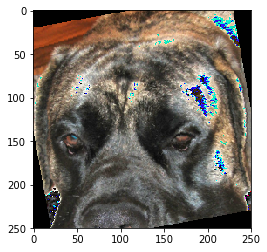

In [36]:
for image in np.array([dog_images_train_testing[10]], dtype='<U106'):
    img = Image.open((image))
    trans = transform_train
    plt.imshow(transforms.ToPILImage()(trans(img)))
    print(trans(img).shape)

In [17]:
class DogDataset(Dataset):
    def __init__(self, dog_path, transform=None, crops=None):
        """
        Args:
            dog_files (string): Directories with all the images for respective purpose.
            transform (callable, optional): Optional transform to be applied on a sample of specific set.
        """
        dog_files = np.array(glob(dog_path))
        labels = np.array(list(map(lambda x: int(re.findall(r'\d+',x)[0])-1, dog_files)))
        self.data = dog_files
        self.labels = labels
        self.transform = transform
        #crops the size of the datasets if necessary to allow for 
        #same batch_sizes and network architecture
        #could not find another useful approach, advice welcome
        self.crops=crops
        
        #maybe also build our classes names dict here for the transfer learn section? 
        #Since we didn't use the built in functions of datasets.ImageFolder to get classes names
        classes = {}
        for file in dog_files:
            # assign class name to label and therefore we can get the class name by using the label 
            classes[int(re.findall(r'\d+',file)[0])-1] = re.findall(r'/dog_images/*/.*/\d+.(.*)/',file)[0].replace("_", " ")
        self.classes = classes
        
    def __len__(self):
        return len(self.data[:self.crops])

    def __getitem__(self, idx):
        # get image with PIL
        img_name = self.data[idx] 
        image = Image.open(img_name)
        
        label = self.labels[idx]
        
        if self.transform:
            image = self.transform(image)
            label = torch.tensor(np.array(label))
        
        return image, label

In [18]:
#adding "random noise" to images for training different angles etc.
# --> image augmentation

transform_train = transforms.Compose([
                                #crop to 224 for vgg16  
                                transforms.RandomResizedCrop(224),                          
                                transforms.RandomHorizontalFlip(),
                                transforms.RandomRotation(20),
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
    
])


# no need to rotate etc. here
transform_valid = transforms.Compose([
                                # need to resize to 224 here as well
                                transforms.Resize((224,224)),
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
])


# no need to rotate etc. here
transform_test = transforms.Compose([
                                # need to resize to 224 here as well
                                transforms.Resize((224,224)),
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
    
])

In [19]:
dog_train = DogDataset(dog_path = "/data/dog_images/train/*/*", transform=transform_train)
dog_valid = DogDataset(dog_path = "/data/dog_images/valid/*/*", transform=transform_valid, crops=-5)
dog_test = DogDataset(dog_path = "/data/dog_images/test/*/*", transform=transform_test, crops=-6)

#reduce batch_sizes of train, valid and test set to 1
batch_size = 10

load_train = DataLoader(dog_train,
                    batch_size=10, 
                    shuffle=True,
                    num_workers=0)

load_test = DataLoader(dog_test,
                    batch_size=10, 
                    shuffle=True,
                    num_workers=0)

load_valid = DataLoader(dog_valid,
                    batch_size=10, 
                    shuffle=True,
                    num_workers=0)

loaders_scratch = {"valid": load_valid, "train": load_train, "test": load_test}

In [20]:
loader = DataLoader(dog_test,
                    batch_size=batch_size,
                    shuffle=True,
                    num_workers=0)

testing = 0
for batch_idx, (data, target) in enumerate(loader):
    print('Batch idx: {}\n shape of input data: {}\n target: {}'.format(
        batch_idx, data.shape, target))
    testing +=1
    if testing == 2:
        break

Batch idx: 0
 shape of input data: torch.Size([10, 3, 224, 224])
 target: tensor([  71,   70,   51,  103,   25,  128,    9,   35,   87,   39])
Batch idx: 1
 shape of input data: torch.Size([10, 3, 224, 224])
 target: tensor([ 100,   13,  111,  103,   22,  116,   34,    7,   42,   43])


In [21]:
dog_train.classes[10]

'Australian cattle dog'

In [22]:
dog_train.classes

{102: 'Mastiff',
 58: 'Doberman pinscher',
 54: 'Curly-coated retriever',
 30: 'Borzoi',
 23: 'Bichon frise',
 48: 'Chinese crested',
 66: 'Finnish spitz',
 129: 'Welsh springer spaniel',
 18: 'Bedlington terrier',
 114: 'Papillon',
 125: 'Saint bernard',
 12: 'Australian terrier',
 115: 'Parson russell terrier',
 106: 'Norfolk terrier',
 132: 'Yorkshire terrier',
 31: 'Boston terrier',
 107: 'Norwegian buhund',
 27: 'Bluetick coonhound',
 65: 'Field spaniel',
 128: 'Tibetan mastiff',
 4: 'Alaskan malamute',
 101: 'Manchester terrier',
 33: 'Boxer',
 67: 'Flat-coated retriever',
 88: 'Irish wolfhound',
 103: 'Miniature schnauzer',
 34: 'Boykin spaniel',
 79: 'Greater swiss mountain dog',
 6: 'American foxhound',
 111: 'Nova scotia duck tolling retriever',
 24: 'Black and tan coonhound',
 71: 'German shorthaired pointer',
 61: 'English setter',
 28: 'Border collie',
 44: 'Cardigan welsh corgi',
 104: 'Neapolitan mastiff',
 75: 'Golden retriever',
 62: 'English springer spaniel',
 77: 'G

In [27]:
len(load_test.dataset)

830

In [140]:
load_test.dataset[830]

(tensor([[[ 1.2557,  1.2214,  1.2214,  ...,  1.0844,  1.1187,  1.1187],
          [ 1.2385,  1.2214,  1.2043,  ...,  0.9646,  1.0159,  1.0331],
          [ 1.1872,  1.1700,  1.1529,  ...,  0.9132,  0.9474,  0.9988],
          ...,
          [ 0.8789,  1.0159,  1.0159,  ...,  1.1872,  1.1872,  1.2557],
          [ 1.0331,  1.0844,  1.0502,  ...,  1.2728,  1.0331,  0.9646],
          [ 1.0673,  1.2214,  0.9646,  ...,  0.9132,  1.0331,  1.1700]],
 
         [[ 1.2556,  1.2381,  1.2031,  ...,  0.9930,  1.0280,  1.0630],
          [ 1.2031,  1.1681,  1.1331,  ...,  0.8880,  0.9230,  0.9755],
          [ 1.1331,  1.0805,  1.0105,  ...,  0.8179,  0.8704,  0.9055],
          ...,
          [ 0.6254,  0.8179,  0.8529,  ...,  0.9230,  0.9405,  1.1155],
          [ 0.8704,  0.9055,  0.8704,  ...,  1.1506,  0.8354,  0.7479],
          [ 0.9405,  1.0805,  0.7829,  ...,  0.6254,  0.7479,  0.9930]],
 
         [[ 1.2282,  1.1934,  1.1759,  ...,  0.8797,  0.9494,  0.9842],
          [ 1.1062,  1.0539,

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**: We resize the images in the train set by randomly shrinking and cropping to the desired input size of 224 * 224. Additionally we augment the dataset by introducing horizontal flips and rotations by 20 degrees (first resize and crop is also random).

We decided on 224 by 224 because that's the input size that the pretrained VGG requires and for comparability with our Net() we decided to stick with that. Larger images result in larger training time. A batch_size of 20 seems reasonable for optimizing steps

The valid and test set don't have random transforms applied but are resized to the same size. We keep in mind the pytorch post https://discuss.pytorch.org/t/how-to-set-the-right-transformations-for-inference/18505/3 if we run into issues... 

We also apply VGG16 normalization on every image.


### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [23]:
print(VGG16)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

In [24]:
import torch.nn as nn
import torch.nn.functional as F

In [30]:
# define the CNN architecture

#####

# SMALLER VERSION of network
# 4 instead of 6 conv layers
# 2 instead of 3 fc layers 
# smaller matrix sizes

#####
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()

        # in: 224x224x3
        self.conv1 = nn.Conv2d(3,16,3, padding=1) # size will only be influenced by maxpool with kernel 3x3 and padding = 1
        # in: 112x112x16
        self.conv2 = nn.Conv2d(16,32,3, padding=1)
        # in 56x56x32
        self.conv3 = nn.Conv2d(32,64,3, padding=1)
        # in 28x28x64
        self.conv4 = nn.Conv2d(64,64,3, padding=1)
        # in 14x14x64
        
        # into fc layer: batch_size * flattened 12544
        self.fc1 = nn.Linear(12544, 4096)
        self.fc2 = nn.Linear(4096, 133) #133 dog classes
        # however, we need to shift all the labels by 1. 
        # Do that above in the data preprocessing though
        
        #dropout:
        # lower the dropout rate from 0.5 to 0.3 compared to VGG
        self.dropout = nn.Dropout(p=0.3) 
        
        # pooling layers
        self.pool = nn.MaxPool2d(2,2) # to half the input dimensions
    
    def forward(self, x):
        ## Define forward behavior
        #print(x.shape)
        x = self.pool(F.relu(self.conv1(x)))
        #print(x.shape)
        x = self.pool(F.relu(self.conv2(x)))
        #print(x.shape)
        x = self.pool(F.relu(self.conv3(x)))
        #print(x.shape)
        x = self.pool(F.relu(self.conv4(x)))
        #print(x.shape)
        
        #fc layer
        x = x.view(batch_size,-1) 
        #print("reshaped x", x.shape)
        x = self.dropout(F.relu(self.fc1(x)))
        #print(x.shape)
        x = self.fc2(x)
        #print("shape before softmax: ", x.shape)
        x = F.log_softmax(x,dim=1) # train with NLLLoss as loss function
        #print("shape after softmax: ",x.shape)
        
        return x
#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ Copied the architecture from VGG as a starting point.
We don't need to differentiate between 1000 classes though but between 133. But it's far more difficult to differentiate between the dog races themselves, so we start out with around "half" the VGG16 net as a starting point. Maybe we need to reduce that because of huge training times.
We keep almost everything the same in the fully connected layers except for the output size (-> 133) and reduce the feature detection steps in the convoluted layer and the convoluted layer size.

We use dropout, but only with p=0.3

Next we realized half of VGG is far too much. We tinkered with the learning rate but to no avail (in a reasonable amount of time). Reduced sizes of layers and number of layers, we save more memory that way as well. After struggling with our first version we toned it down a little toward an example found here: https://medium.com/octavian-ai/which-optimizer-and-learning-rate-should-i-use-for-deep-learning-5acb418f9b2

We now steadily dropped in validation error and optimized the learning rate (even lower) since we oscillated on validation error after a few epochs

We also drop a few images from the valid and test set to enable a batch size of 10 for all DataLoaders and a consistent flattening of our input tensors to the fc layers.
- could not find another working approach for our convo networks, advice welcome

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [26]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.NLLLoss()

### TODO: select optimizer
optimizer_scratch = optim.Adam(model_scratch.parameters(), lr=0.0003) # lr 0.003 too high... 
# 0.0003 works, some oscillation. Try 0.0001 next if this doesn't work?

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [145]:
len(loaders_scratch['train'].dataset)

6680

In [143]:
len(loaders_scratch['valid'].dataset)

830

In [144]:
len(loaders_scratch['test'].dataset)
# need a batch_size of multiples of 2 for test and 5 for valid...
# they don't go so well together with the network architecture...
# eliminate 6 pictures from the test set, 5 from valid set
# then we can use batch_size of 10 for all of em!

830

In [29]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            #print progress
            if (batch_idx+1) % 200 == 0:
                print("{} pictures done".format((batch_idx+1)*data.shape[0]))
            # zero gradients fist
            optimizer.zero_grad()
            #output result
            result = model(data)
            #compute loss
            loss = criterion(result, target)
            # add up the losses
            #train_loss += (1/ (batch_idx+1)) * (loss.item() - train_loss) 
            #could also add up losses with loss.item()*batch_size and then
            #divide the sums of losses by the dataset length
            #print("data.shape[0]: ", data.shape[0])
            #print("loss.item().shape: ", loss.item().shape)
            
            #train_loss += loss.item() * data.shape[0]
            train_loss += (1/ (batch_idx+1)) * (loss.data - train_loss) 
            #compute gradient and take a step...
            loss.backward()
            optimizer.step()
            
        #train_loss = train_loss / (len(loaders['train'].dataset))
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            with torch.no_grad():
                val_res = model(data)
                loss = criterion(val_res, target)
                #valid_loss += (1/ (batch_idx+1)) * (loss.item() - valid_loss)
                #valid_loss += loss.item() * data.shape[0]
                valid_loss += (1/ (batch_idx+1)) * (loss.item() - valid_loss)
                
        #valid_loss = valid_loss / (len(loaders['valid'].dataset))                
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss_min> valid_loss:
                   valid_loss_min = valid_loss
                   torch.save(model.state_dict(),save_path)
                
                   print("saving model with valid_loss: {}\n".format(valid_loss))

    # return trained model
    return model


# train the model
#model_scratch = train(100, loaders_scratch, model_scratch, optimizer_scratch, 
#                      criterion_scratch, use_cuda, 'model_scratch.pt')

In [158]:
from workspace_utils import active_session
# keep notebook awake while function runs
with active_session():
    # do long-running work here
    model_scratch = train(100, loaders_scratch, model_scratch, optimizer_scratch, 
                          criterion_scratch, use_cuda, 'model_scratch.pt')

2000 pictures done
4000 pictures done
6000 pictures done
Epoch: 1 	Training Loss: 4.745009 	Validation Loss: 4.553019
saving model with valid_loss: 4.553019259349409
2000 pictures done
4000 pictures done
6000 pictures done
Epoch: 2 	Training Loss: 4.505614 	Validation Loss: 4.383273
saving model with valid_loss: 4.383272627750073
2000 pictures done
4000 pictures done
6000 pictures done
Epoch: 3 	Training Loss: 4.375030 	Validation Loss: 4.278228
saving model with valid_loss: 4.2782280071672165
2000 pictures done
4000 pictures done
6000 pictures done
Epoch: 4 	Training Loss: 4.234720 	Validation Loss: 4.199570
saving model with valid_loss: 4.199570138770414
2000 pictures done
4000 pictures done
6000 pictures done
Epoch: 5 	Training Loss: 4.105286 	Validation Loss: 4.028911
saving model with valid_loss: 4.028910932770695
2000 pictures done
4000 pictures done
6000 pictures done
Epoch: 6 	Training Loss: 3.999334 	Validation Loss: 4.000294
saving model with valid_loss: 4.000293866697564
200

KeyboardInterrupt: 

In [ ]:
# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))
model_scratch.eval()

In [49]:
# loading on CPU:
model_scratch.load_state_dict(torch.load('model_scratch.pt', map_location=lambda storage, loc: storage))
model_scratch.eval()

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=12544, out_features=4096, bias=True)
  (fc2): Linear(in_features=4096, out_features=133, bias=True)
  (dropout): Dropout(p=0.3)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [37]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

In [160]:
# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

##
# great, even after training for only 23 epochs we are "already" at 20% accuracy...
# sure takes a long time to get good results here

Test Loss: 3.332355


Test Accuracy: 20% (174/830)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [32]:
## TODO: Specify data loaders
loaders_transfer = {"valid": load_valid, "train": load_train, "test": load_test}

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [33]:
import torchvision.models as models
import torch.nn as nn
for param in VGG16.features.parameters():
    param.requires_grad = False

classifier = nn.Sequential(
    nn.Linear(25088,4096),
    nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(4096,4096),
    nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(4096,133),
    nn.LogSoftmax(dim=1)
)

last_layer = nn.Linear(4096,133)

## TODO: Specify model architecture 
# we have a smaller dataset but a few more dog breeds / classes than imagenet
# but the two are similar: vgg is able to differentiate between 118 different dog breeds already 
# --> we can freeze the weights on the convo layers, use those as feature extractors and 
# retrain the whole classifier section for our dog breed classifier 




#VGG16.classifier = classifier # option with more training time, try after if we don't reach 60% test acc.
VGG16.classifier[6] = last_layer # option with less training time

model_transfer = VGG16


if use_cuda:
    model_transfer = model_transfer.cuda()

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 
 we have a smaller dataset but a few more dog breeds / classes than imagenet
 but the two are very similar and we can benefit from vgg as a feature extractor: vgg is able to differentiate between the 118 different dog breeds in imagenet already.
 --> we can freeze the weights on the convo layers, use those as feature extractors and 
 retrain the whole classifier section for our dog breed classifier. This might lead to overfitting however and will also take more time.
 We might also get good results already when we just retrain the final vgg classifier/output layer 6 for a few more dog breed classes but much less than the 1000 imagenet classes --> we can avoid overfitting that way. 
 Try that first to be sure.
 
 If the new data set is small and similar to the original training data:

from the presentation:
- slice off the end of the neural network
- add a new fully connected layer that matches the number of classes in the new data set
- randomize the weights of the new fully connected layer; freeze all the weights from the pre-trained network
- train the network to update the weights of the new fully connected layer
- To avoid overfitting on the small data set, the weights of the original network will be held constant rather than re-training the weights. 

Since the data sets are similar, images from each data set will have similar higher level features (_in our case dog breeds_). Therefore most or all of the pre-trained neural network layers already contain relevant information about the new data set and should be kept.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [34]:
print(model_transfer)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

In [35]:
#criterion_transfer = nn.NLLLoss() # for the full classifier from scratch
criterion_transfer = nn.CrossEntropyLoss() # for the last retrained fc layer only

optimizer_transfer = optim.Adam(model_transfer.classifier.parameters(), lr=0.0003)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [34]:
from workspace_utils import active_session
# keep notebook awake while function runs
with active_session():
    # train the model
    model_transfer =  train(8, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

2000 pictures done
4000 pictures done
6000 pictures done
Epoch: 1 	Training Loss: 3.450852 	Validation Loss: 1.423210
saving model with valid_loss: 1.4232096162187047

2000 pictures done
4000 pictures done
6000 pictures done
Epoch: 2 	Training Loss: 2.755732 	Validation Loss: 1.128246
saving model with valid_loss: 1.1282456477722493

2000 pictures done
4000 pictures done
6000 pictures done
Epoch: 3 	Training Loss: 2.554554 	Validation Loss: 1.215191
2000 pictures done
4000 pictures done
6000 pictures done
Epoch: 4 	Training Loss: 2.465246 	Validation Loss: 1.201434
2000 pictures done
4000 pictures done
6000 pictures done
Epoch: 5 	Training Loss: 2.409571 	Validation Loss: 1.022022
saving model with valid_loss: 1.0220224754997047

2000 pictures done
4000 pictures done
6000 pictures done
Epoch: 6 	Training Loss: 2.397556 	Validation Loss: 0.969021
saving model with valid_loss: 0.9690207566123412

2000 pictures done
4000 pictures done
6000 pictures done
Epoch: 7 	Training Loss: 2.311369 	

KeyboardInterrupt: 

In [36]:
# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))
model_transfer.eval()

RuntimeError: cuda runtime error (35) : CUDA driver version is insufficient for CUDA runtime version at torch/csrc/cuda/Module.cpp:51

In [50]:
# loading on CPU:
model_transfer.load_state_dict(torch.load('model_transfer.pt', map_location=lambda storage, loc: storage))
model_transfer.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [38]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

# alright, we got it after 7 epochs

Test Loss: 0.989995


Test Accuracy: 70% (584/830)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [38]:
re.findall(r'/dog_images/*/.*/\d+.(.*)/',dog_files[50])[0].replace("_", " ")

'Mastiff'

In [55]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
#class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    image = Image.open(img_path)
    # apply transforms
    image = transform_test(image)
    # need to add "batch dimension" for the model to accept our input
    image.unsqueeze_(0)
    # use cuda?
    image = image.to(device)
    if use_cuda:
        model_transfer.cuda() 
    # get prediction (will we get an index for that?)
    model_transfer.eval()
    with torch.no_grad():
        prediction = model_transfer(image)
    # prediction needs to be run through
    values, indices = prediction.max(1) # get the max along the dim=1
    # map indices to dog breeds?
    # then return mapped name
    return dog_train.classes[indices.cpu().numpy()[0]]


In [57]:
for i in range(1,6000,500):
    print(predict_breed_transfer(dog_files[i]))
    print(dog_files[i])

Bullmastiff
/data/dog_images/train/103.Mastiff/Mastiff_06826.jpg
Papillon
/data/dog_images/train/115.Papillon/Papillon_07482.jpg
Manchester terrier
/data/dog_images/train/102.Manchester_terrier/Manchester_terrier_06794.jpg
German shorthaired pointer
/data/dog_images/train/072.German_shorthaired_pointer/German_shorthaired_pointer_05020.jpg
Pekingese
/data/dog_images/train/091.Japanese_chin/Japanese_chin_06163.jpg
Bull terrier
/data/dog_images/train/039.Bull_terrier/Bull_terrier_02730.jpg
Great pyrenees
/data/dog_images/train/095.Kuvasz/Kuvasz_06415.jpg
Chesapeake bay retriever
/data/dog_images/train/047.Chesapeake_bay_retriever/Chesapeake_bay_retriever_03384.jpg
Dachshund
/data/dog_images/train/056.Dachshund/Dachshund_03982.jpg
Glen of imaal terrier
/data/dog_images/train/075.Glen_of_imaal_terrier/Glen_of_imaal_terrier_05163.jpg
Bulldog
/data/dog_images/train/040.Bulldog/Bulldog_02824.jpg
Border terrier
/data/dog_images/train/030.Border_terrier/Border_terrier_02127.jpg


---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [99]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    # because dog_detector has a much lower false positive rate (humans don't get "detected" as dogs as much)
    # we use the dog detector first and the face_detector after. 
    # Giving priority to identifying dog (breeds) in images
    if dog_detector(img_path):
        print("detected a (resembling) dog breed: {1}. \tImagepath: {0}\n".format(img_path, predict_breed_transfer(img_path)))
        
    elif face_detector(img_path):
        print("detected a human face: {1}. \tImagepath: {0}\n".format(img_path, predict_breed_transfer(img_path)))

    else:
        print("no human face or resembling dog breed in image detected. Imagepath: {}\n".format(img_path))


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)
I'm not sure what I expected. Predicting dog breeds for human faces is curious :) 
- We detected a few faces and predicted a resembling dog breed (no right solution for that one I guess). We also didn't detect some faces. I expected to detect more faces.
- We also did not correctly classify or even "see" that there was a dog in some images...but it's mixed race for sure, so:
--> we can improve the algorithm by improving our predictions for mixed race dogs like in the rubric improvement section
--> improve the dog detection function in our images
--> provide images with either dogs or humans but not both at the same time
--> provide better quality images
--> can write a better _dog_detector_ algorithm that uses the features from VGG but retrains the last layer of the fc to predict if we have a dog in the image (binary) instead of predicting a single of the 118 classes (we possibly miss many dogs that way)
--> can train the model_transfer better 

In [84]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:8], dog_files[:8])):
    run_app(file)

German pinscher
Dalmatian
Labrador retriever
Chesapeake bay retriever
Labrador retriever
Xoloitzcuintli
German pinscher
Chinese shar-pei


In [97]:
np.array(glob("svenpix/*"))

array(['svenpix/dog_and_grandma.jpg', 'svenpix/dad.jpg',
       'svenpix/dog_and_grandma3.jpg', 'svenpix/uncle.jpg',
       'svenpix/dad2.jpg',
       'svenpix/2014_10_04_Klettersteig_Savognin024.jpg',
       'svenpix/mum.jpg', 'svenpix/dog_and_grandma2.jpg'], 
      dtype='<U47')

In [98]:
# load filenames from computer
sven_files = np.array(glob("svenpix/*"))

# print number of images in each dataset
print('There are %d total images.' % len(sven_files))


There are 8 total images.


In [100]:
for file in sven_files:
    run_app(file)

no human or dog in image detected. Imagefile: svenpix/dog_and_grandma.jpg

detected a human face: Xoloitzcuintli. Imagepath: svenpix/dad.jpg

detected a human face: Dalmatian. Imagepath: svenpix/dog_and_grandma3.jpg

detected a human face: Xoloitzcuintli. Imagepath: svenpix/uncle.jpg

no human or dog in image detected. Imagefile: svenpix/dad2.jpg

detected a human face: Anatolian shepherd dog. Imagepath: svenpix/2014_10_04_Klettersteig_Savognin024.jpg

detected a human face: Manchester terrier. Imagepath: svenpix/mum.jpg

no human or dog in image detected. Imagefile: svenpix/dog_and_grandma2.jpg

